In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import calendar
import numpy as np
import pandas as pd
from joblib import load

from helper import *

In [3]:
showings = load('../data/showings_extra_feature.joblib')
showings.replace(np.inf, 0, inplace=True)
genres = load('../data/genres.joblib')

# Coverage by two genre combo

In [70]:
%%time
all_genres = showings.tmdb_genre_ids.tolist()
all_genre_tuples = set(tuple(np.sort(i)) for i in all_genres if len(i) > 1)
all_combos = [(i, j) for j in list(genres.keys()) for i in list(genres.keys()) if i < j]

genre_combo = list()
for i in all_combos:
    for j in all_genre_tuples:
        if i[0] in j and i[1] in j:
            genre_combo.append(i)
            break

Wall time: 4.92 s


In [71]:
%%time
stats = dict()
for i in genre_combo:
    stats[genres[i[0]] + '-' + genres[i[1]]] = showings.loc[
        showings.tmdb_genre_ids.apply(lambda numbers: i[0] in numbers and i[1] in numbers),
        'coverage']

Wall time: 42.5 s


In [72]:
delete = [i for i, j in stats.items() if j.count() < 1000]
for i in delete:
    del stats[i]

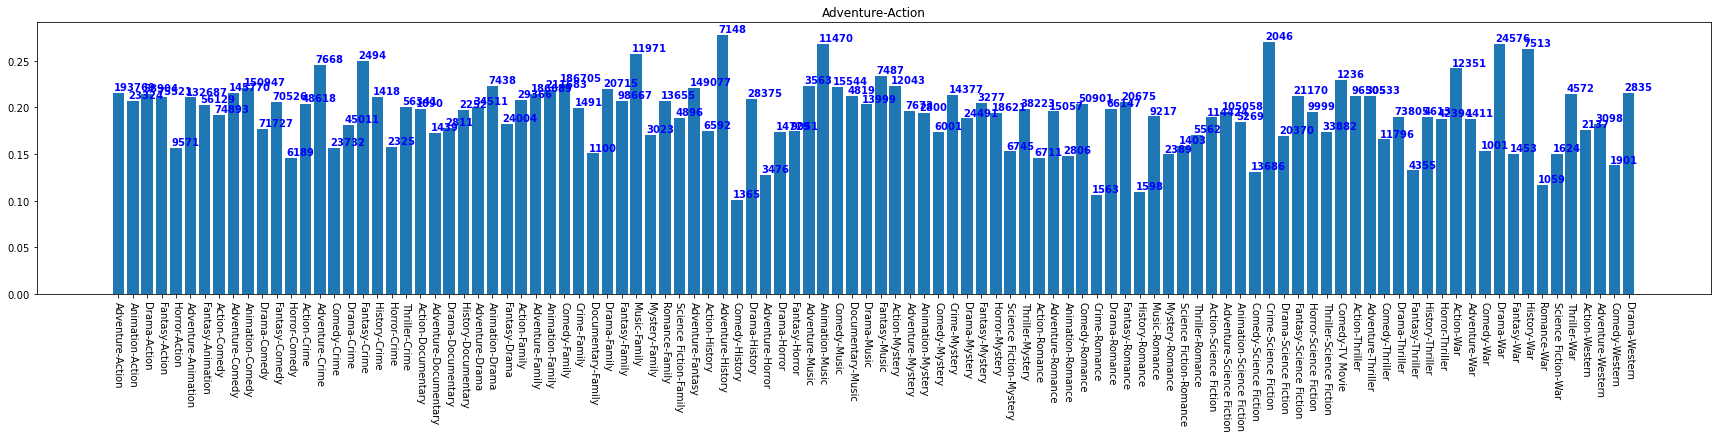

In [73]:
bar_plot(stats, r=270)